In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, to_rgb
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.stats import shapiro
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import warnings
# ignore warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
#import data as data frame
Asteroid = pd.read_csv(r"C:/Users/Brailyn King/Desktop/NEA.csv",low_memory=False)
#drop unused features
Asteroid = Asteroid.drop(["full_name", "name", "albedo", "diameter_sigma", 
                          "orbit_id", "epoch", "equinox", "spkid",
                          "epoch_mjd", "epoch_cal","sigma_e", "sigma_a",
                         "sigma_q","sigma_i", "sigma_om", "sigma_w", "sigma_ma",
                          "sigma_ad", "sigma_n", "sigma_tp","sigma_per", "class",
                          "rms", "id", "prefix", "diameter_sigma", "moid_ld", "pdes", 
                         "diameter", "tp", "tp_cal"],axis=1)  


display(Asteroid) #visualize data
data = Asteroid.copy()
   
df = data.select_dtypes(include=["float64", "int64"])  # for OBSERVATIONn
display(df)

,H,e,a,q,i,om,w,ma,ad,n,per,per_y,moid
0,3.400,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,1683.145703,4.608202,1.594780
1,4.200,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,1687.410992,4.619880,1.234290
2,5.330,0.256936,2.668285,1.982706,12.991043,169.851483,248.066193,125.435355,3.353865,0.226129,1592.013769,4.358696,1.034290
3,3.000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,1325.432763,3.628837,1.139480
4,6.900,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,1508.414421,4.129814,1.095750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,17.135,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,1258.191614,3.444741,0.861979
958520,18.500,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,1303.177916,3.567907,0.671242
958521,20.400,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,1727.085364,4.728502,0.035589
958522,18.071,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,1335.311579,3.655884,0.893896


In [4]:
# change string variable to int variable
encode = LabelEncoder()

data["pha"] = encode.fit_transform(data["pha"])
data["neo"] = encode.fit_transform(data["neo"])
# create class feature
data['Class'] = 0

#Non-NEO = class 0 
#NEO = class 1
#PHA = class 2
# Iterate over each row to determine class
for ind in data.index:
    if data['neo'][ind] == 0 and data['pha'][ind] == 0:
        data['Class'][ind] = 0
    if data['neo'][ind] == 1 and data['pha'][ind] == 0:
        data['Class'][ind] = 1
    if data['neo'][ind] == 1 and data['pha'][ind] == 1:
        data['Class'][ind] = 2
#visulize data change
#display(data) 


,neo,pha,H,e,a,q,i,om,w,ma,ad,n,per,per_y,moid,Class
0,0,0,3.400,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,1683.145703,4.608202,1.594780,0
1,0,0,4.200,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,1687.410992,4.619880,1.234290,0
2,0,0,5.330,0.256936,2.668285,1.982706,12.991043,169.851483,248.066193,125.435355,3.353865,0.226129,1592.013769,4.358696,1.034290,0
3,0,0,3.000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,1325.432763,3.628837,1.139480,0
4,0,0,6.900,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,1508.414421,4.129814,1.095750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,0,0,17.135,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,1258.191614,3.444741,0.861979,0
958520,0,0,18.500,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,1303.177916,3.567907,0.671242,0
958521,1,1,20.400,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,1727.085364,4.728502,0.035589,2
958522,0,0,18.071,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,1335.311579,3.655884,0.893896,0


AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [5]:
#save data to file
data.to_csv(r"C:/Users/Brailyn King/Desktop/ML_Data.csv")

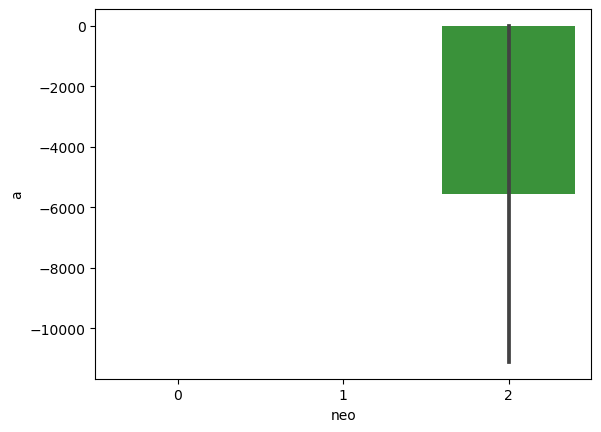

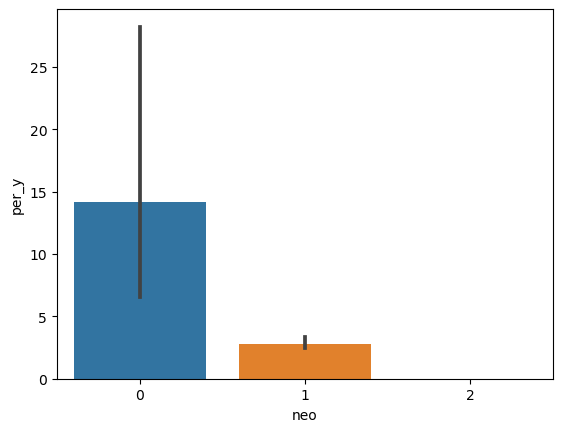

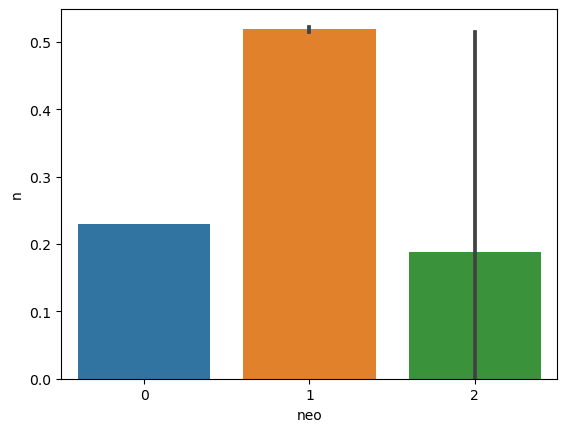

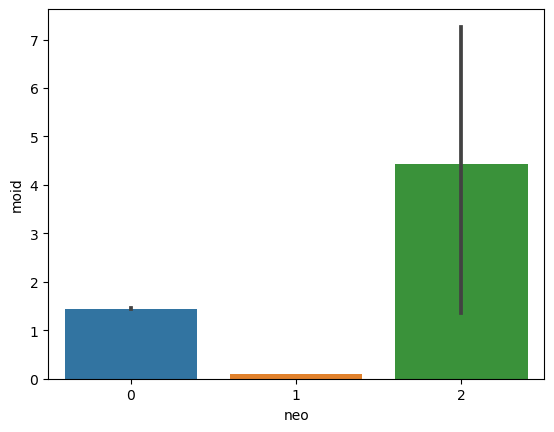

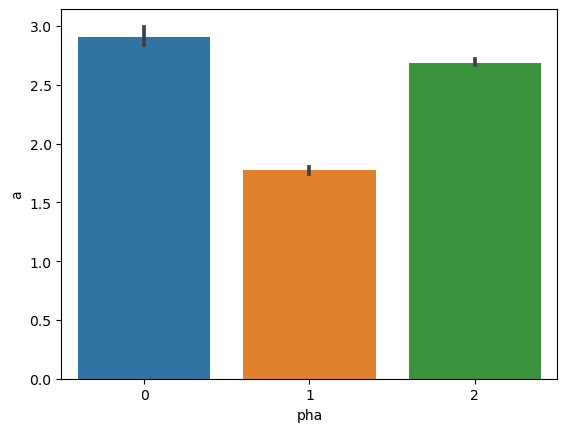

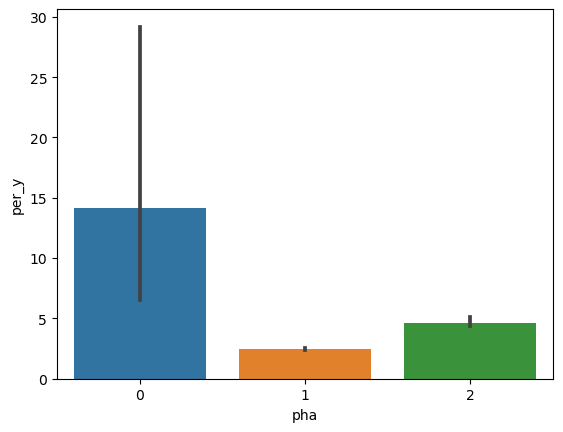

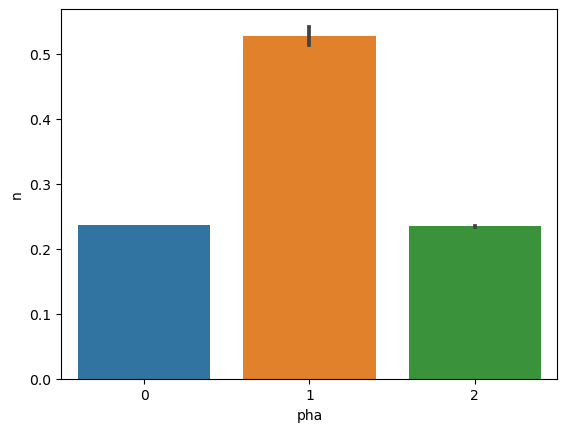

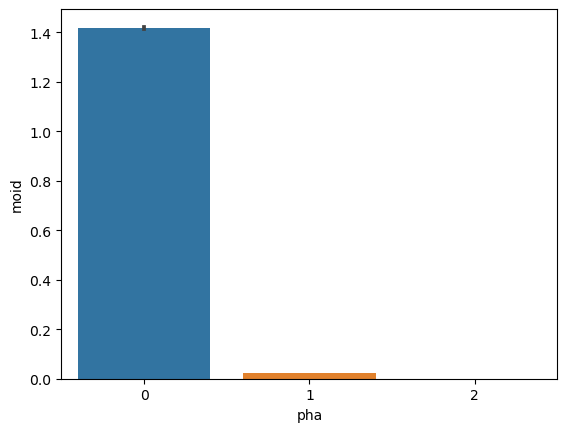

In [7]:
#visualize the data distributions
sns.barplot(x="neo", y="a", data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-1.jpg")
plt.show()
# N+

sns.barplot(x="neo", y="per_y", data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-2.jpg")
plt.show()
# N+

sns.barplot(x="neo", y="n", data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-3.jpg")
plt.show()
# Y+

sns.barplot(x="neo", y="moid", data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-4.jpg")
plt.show()
# N+

sns.barplot(x="pha", y="a", data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-5.jpg")
plt.show()
# N+

sns.barplot(x="pha", y="per_y", data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-6.jpg")
plt.show()
# N+

sns.barplot(x="pha", y="n", data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-7.jpg")
plt.show()
# Y+

sns.barplot(x="pha", y="moid", data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-8.jpg")
plt.show()
# N+

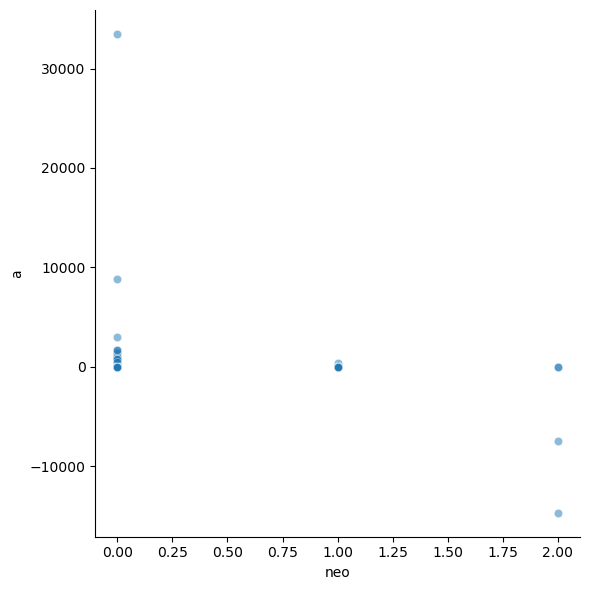

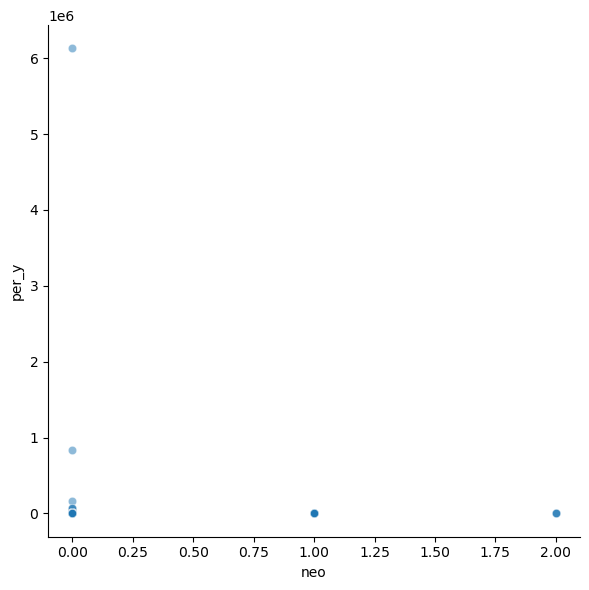

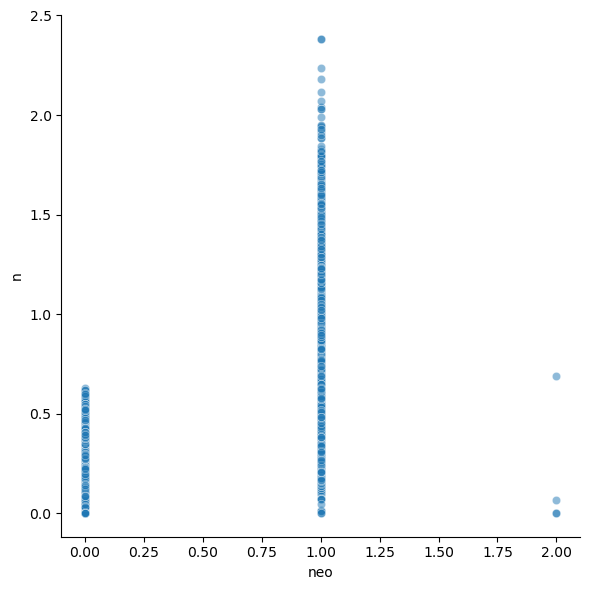

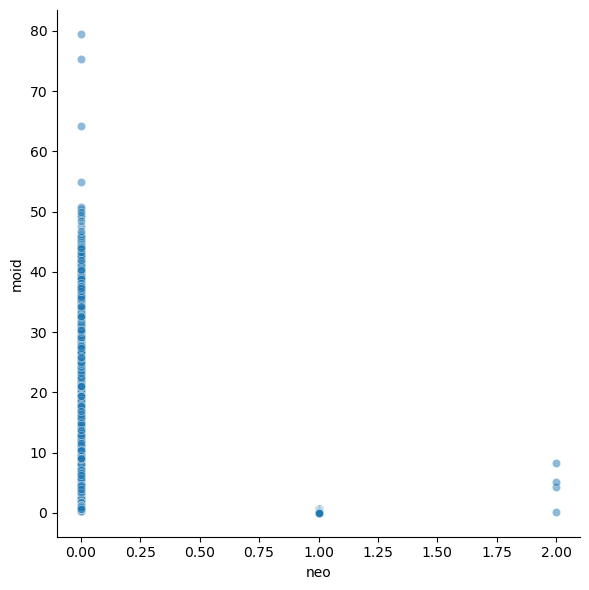

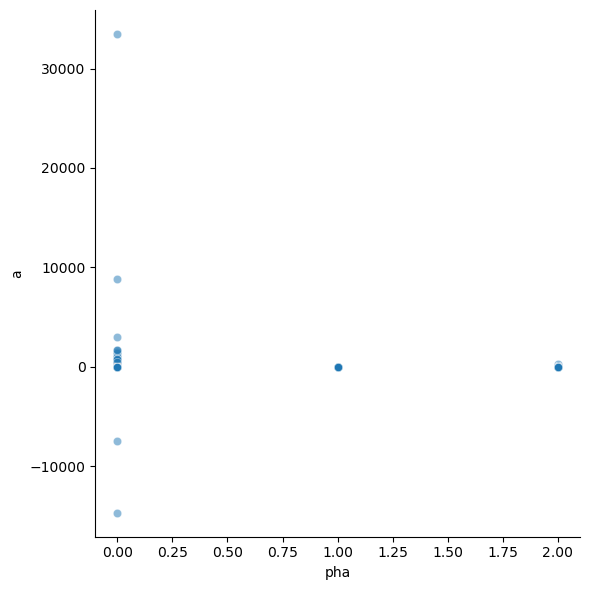

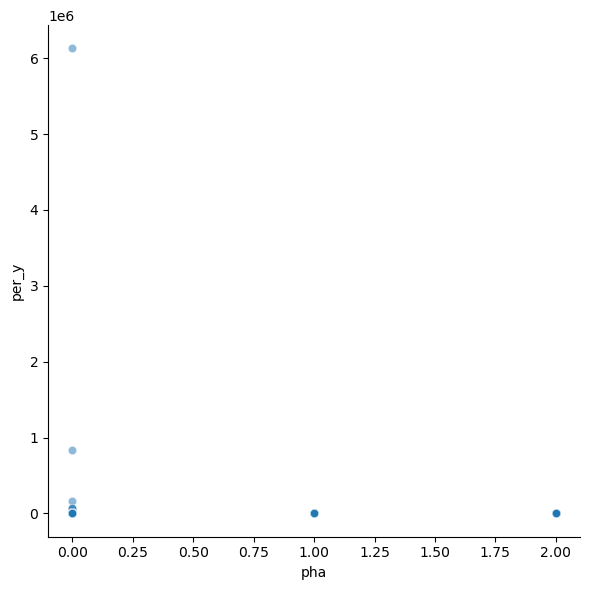

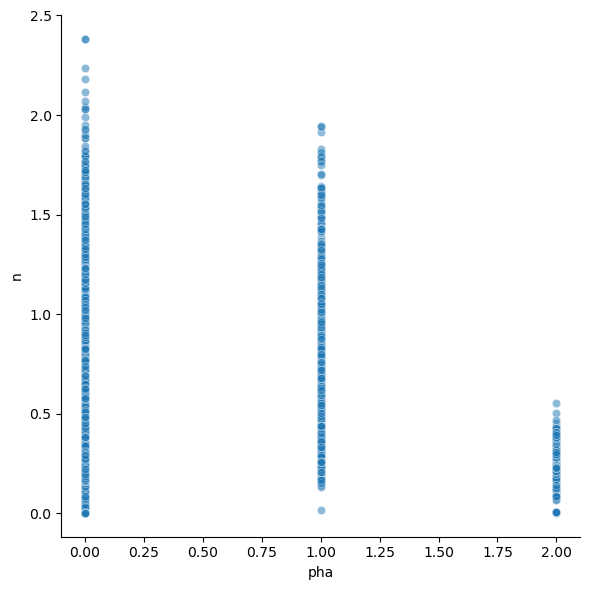

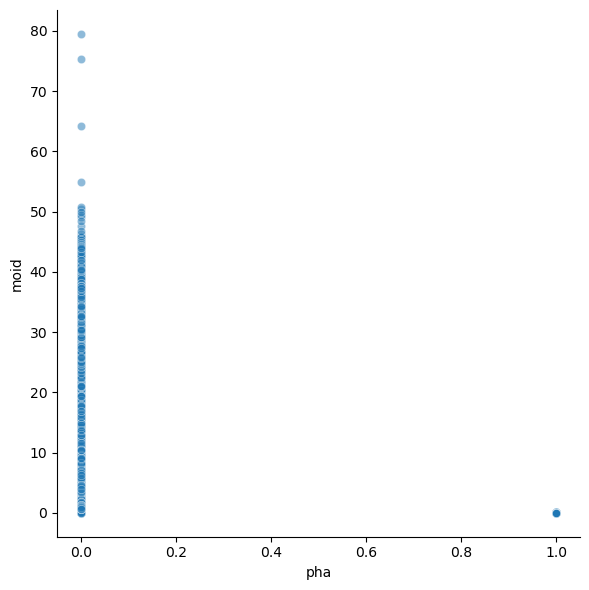

In [8]:
# more data visualization
sns.relplot(x="neo", y="a", sizes=(40, 400), alpha=.5,
            height=6, data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-9.jpg")
plt.show()


sns.relplot(x="neo", y="per_y", sizes=(40, 400), alpha=.5,
            height=6, data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-10.jpg")
plt.show()


sns.relplot(x="neo", y="n", sizes=(40, 400), alpha=.5,
            height=6, data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-11.jpg")
plt.show()


sns.relplot(x="neo", y="moid", sizes=(40, 400), alpha=.5,
            height=6, data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-12.jpg")
plt.show()


sns.relplot(x="pha", y="a", sizes=(40, 400), alpha=.5,
            height=6, data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-13.jpg")
plt.show()


sns.relplot(x="pha", y="per_y", sizes=(40, 400), alpha=.5,
            height=6, data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-14.jpg")
plt.show()


sns.relplot(x="pha", y="n", sizes=(40, 400), alpha=.5,
            height=6, data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-15.jpg")
plt.show()


sns.relplot(x="pha", y="moid", sizes=(40, 400), alpha=.5,
            height=6, data=data)
plt.savefig(r"C:/Users/Brailyn King/Desktop/output-16.jpg")
plt.show()

In [16]:
# shapiro tests of normality to determina data usability
print(shapiro(df["a"]))
# p > 0.5
print(shapiro(df["e"]))
# NOT ACCEPTABLE
print(shapiro(df["i"]))
# NOT ACCEPTABLE
print(shapiro(df["om"]))
# NOT ACCEPTABLE
print(shapiro(df["w"]))
# NOT ACCEPTABLE
print(shapiro(df["q"]))
# NOT ACCEPTABLE
print(shapiro(df["ad"]))
# p > 0.5 ACCEPTABLE
print(shapiro(df["per_y"]))
# p > 0.5 ACCEPTABLE
print(shapiro(df["H"]))
# p > 0.5 ACCEPTABLE
print(shapiro(df["moid"]))
# p > 0.5 ACCEPTABLE
print(shapiro(df["n"]))
# p > 0.5 ACCEPTABLE
print(shapiro(df["ma"]))
# p > 0.5 ACCEPTABLE
print("-" * 8)

ShapiroResult(statistic=0.001229703426361084, pvalue=0.0)
ShapiroResult(statistic=0.8810791969299316, pvalue=0.0)
ShapiroResult(statistic=0.8712323904037476, pvalue=0.0)
ShapiroResult(statistic=0.9549046754837036, pvalue=0.0)
ShapiroResult(statistic=0.954670250415802, pvalue=0.0)
ShapiroResult(statistic=0.15050846338272095, pvalue=0.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=0.6440906524658203, pvalue=0.0)
ShapiroResult(statistic=nan, pvalue=1.0)
--------


In [17]:
# drop unusable data
data.dropna(how="all", inplace=True)

listColumnsNumeric = ["a", "ad", "per_y", "n", "per", "ma"]

for i in listColumnsNumeric:
    data[i].fillna(data[i].mean(), inplace=True)

data.dropna(inplace=True)

In [18]:
# select for certain dtypes
dfCorr = data.select_dtypes(include=["float64", "int64", "int32"])
#sample my subset
subset = dfCorr.sample(n=100000)
#create x and y
x = subset.drop(["pha","neo","Class"], axis=1)
y = subset["Class"]
#test train split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20, random_state=42)

In [32]:
#create my color list
colors = ['white','dodgerblue','crimson']
#create my decision tree
clf = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,)
#train my decision tree
clf.fit(xTrain, yTrain)
#predict
predict = clf.predict(xTest)
#gather metrics
print("Accuracy Score", accuracy_score(yTest,predict))

R2CV = cross_val_score(clf,xTest,yTest,cv=10).mean()
print("Cross Val Score", R2CV)

error = mean_squared_error(yTest,predict)
print("Mean Squared Error", np.sqrt(error))

print(classification_report(yTest,predict))
print(roc_curve(yTest,predict,pos_label=1))

Accuracy Score 0.99975
Cross Val Score 0.9996499999999999
Mean Squared Error 0.015811388300841896
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19489
           1       1.00      0.99      0.99       467
           2       0.91      0.98      0.95        44

    accuracy                           1.00     20000
   macro avg       0.97      0.99      0.98     20000
weighted avg       1.00      1.00      1.00     20000

(array([0.       , 0.0022014, 0.0022526, 1.       ]), array([0.        , 0.00856531, 1.        , 1.        ]), array([3, 2, 1, 0], dtype=int64))


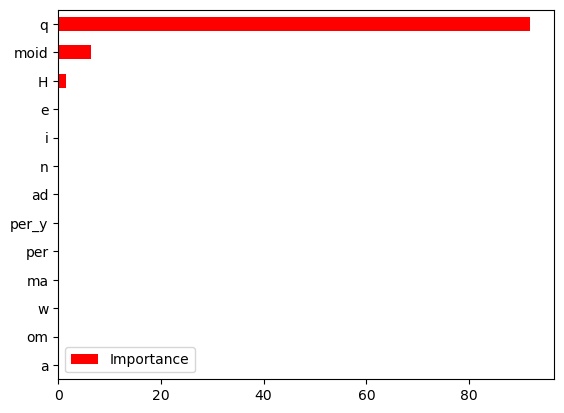

In [24]:
#Decision tree feature importance
Importance = pd.DataFrame({"Importance": clf.feature_importances_ * 100},
                          index=xTrain.columns)

Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.show()

Model accuracy score with criterion entropy: 0.9998


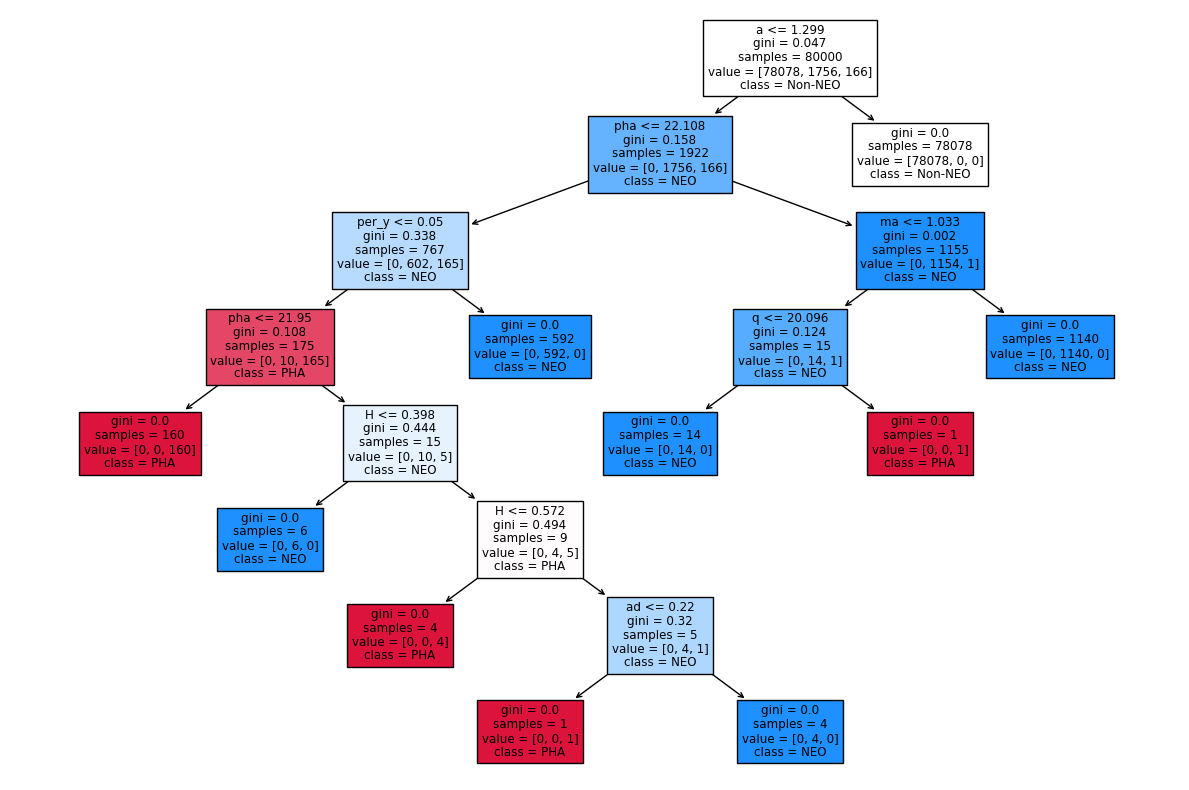

In [27]:
#plot decision tree
plt.figure(figsize=(12,8))
from sklearn import tree
feature_names = np.array(['pha', 'H', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'per',
       'per_y', 'moid'], dtype=object)
class_names = np.array(['Non-NEO','NEO','PHA'], dtype = object)


artists = tree.plot_tree(clf, feature_names = feature_names, class_names = class_names,filled=True)
for artist, impurity, value in zip(artists, clf.tree_.impurity, clf.tree_.value):
    # let the max value decide the color; whiten the color depending on impurity (gini)
    r, g, b = to_rgb(colors[np.argmax(value)])
    f = impurity * 2 # for N colors: f = impurity * N/(N-1) if N>1 else 0
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')

plt.tight_layout()
plt.show()

In [28]:
#decision tree confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest, predict)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[19489     0     0]
 [    0   464     3]
 [    0     1    43]]


In [31]:
#train random forest
rf = RandomForestClassifier().fit(xTrain,yTrain)
#predict random forest
predict = rf.predict(xTest)
#show metrics
print("Accuracy Score", accuracy_score(yTest,predict))

R2CV = cross_val_score(rf,xTest,yTest,cv=10).mean()
print("Cross Val Score",R2CV)

error = mean_squared_error(yTest,predict)
print("Mean Squared Error", np.sqrt(error))

print(classification_report(yTest,predict))
print(roc_curve(yTest,predict))

Accuracy Score 0.99985
Cross Val Score 0.9994500000000001
Mean Squared Error 0.01224744871391589
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19489
           1       1.00      1.00      1.00       467
           2       0.98      0.98      0.98        44

    accuracy                           1.00     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       1.00      1.00      1.00     20000



ValueError: multiclass format is not supported

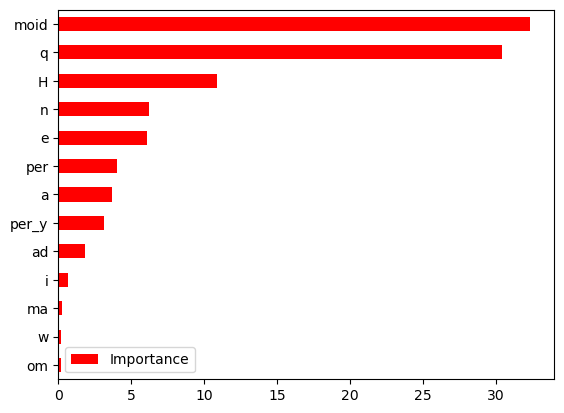

In [30]:
# random forest feature importance
Importance = pd.DataFrame({"Importance": rf.feature_importances_ * 100},
                          index=xTrain.columns)

Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.show()